# Week 1: Basic Python Operations for Working with Text

## Overview

By the end of this week, you should be able to perform the following operations:


#### Text Analytics
- **load a text file into memory** using Python's built-in streaming libraries
- **visualize word count and line length distributions** as histograms using Matplotlib

#### Software Engineering
- **read strings from a text input/output stream** using `readline()` and `readlines()`
- **use both native Python dictionaries and `collections.Counter` objects** to produce word counts for a text corpus
- perform basic search/replace operations using **regular expressions** (we will cover Week 2)
- use `map()` and `filter()` functions to efficiently transform and filter large amounts of text (we will cover Week 2)

#### Statistics / Machine Learning
- **create a word transition matrix using Numpy arrays**, which can be used for probabilistic inference and text generation (we will cover Week 2)


## Loading Text into Memory

There are a variety of ways to hold data within memory. For text analytics and natural language processing purposes, we'll be most concerned with the following:

- **list**
- **set**
- **dictionary**
- **tuple**
- **Numpy array**

Imagine that we would like to find the most commonly used words in ***A Tale of Two Cities***, by the famed English novelist Charles Dickens, stored in a text file called **`tale-of-two-cities.txt`**, in the same directory as this Jupyter notebook. Later on, we'll use 3rd-party libraries to automate much of the processing, but for now, we'll explore Python's built-in functions for text processing.

#### Opening Files

The **`open()`** function takes *two* parameters; **filename**, and **mode**. In our case, `mode` is set to `r` for **read**, since we plan to read the file's contents, as opposed to `w` (write), or `a` (append).

In [1]:
text_file = open("tale-of-two-cities.txt", "r")
print(text_file)

<_io.TextIOWrapper name='tale-of-two-cities.txt' mode='r' encoding='UTF-8'>


Typically, a text character is **1 byte** in size. One byte is equal to **32 bits**. This means conceptually, the size of a string should be $N$ bytes, where $N$ is the number of characters. However, you'll see that in Python, the size of a string is larger:

In [2]:
import sys
EMPTY_STRING = ""
ONE_CHAR_STRING = "a"
TWO_CHAR_STRING = "ab"
print(f"The size of EMPTY_STRING is {sys.getsizeof(EMPTY_STRING)} bytes.")
print(f"The size of ONE_CHAR_STRING is {sys.getsizeof(ONE_CHAR_STRING)} bytes.")
print(f"The size of TWO_CHAR_STRING is {sys.getsizeof(TWO_CHAR_STRING)} bytes.")

The size of EMPTY_STRING is 49 bytes.
The size of ONE_CHAR_STRING is 50 bytes.
The size of TWO_CHAR_STRING is 51 bytes.


The **`open()`** function returns a **`TextIOWrapper`** object from Python's `io` module, which handles common input/output streaming operations. 

A **stream** is a potentially infinite sequence of elements (in our case, characters) arriving over time. You'll use streams to model data that is **unbounded** (it's undetermined the volume, the length, and frequency of the data). A stream has a pointer to its current position within the sequence. 

This object has an extremely helpful **`readline()`** method that reads from a text file until encountering an **`EOF`** marker or a new line symbol.

In [3]:
text_file.readline()

'  IT WAS the best of times, it was the worst of times, it was the\n'

You can pass in a parameter to **`readline()`** to control how many bytes of input stream data you'll receive. For instance, **`readline(2)`** returns at most 2 bytes of text input data. You might use this, for instance, if your Python application is reading not from a flat text file, but from a socket, which supplies a continuous stream of data with fixed length (ie., the messages all have the same number of characters).

**In-Class Question**: *Assume you just opened the text file with **`open()`**. What output is returned when **`text_file.readline(5)`** is called the **second** time?*
- **A)** The entire first line of the novel
- **B)** The first 5 characters of the second line
- **C)** The entire second line of the novel
- **D)** The first 5 characters of the first line
- **E)** The 6th-10th characters of the first line

In [4]:
text_file.seek(0) #reset the stream position to the start of the text file
for i in range(2): # repeat the below line twice
    print(f"Iteration {i + 1}: {text_file.readline(5)}")

Iteration 1:   IT 
Iteration 2: WAS t


Each time that you call **`readline()`**, a position marker within **`TextIOWrapper`** is moved forward:
<img src="images/readline.png" width="500" height="300" align="center"/>
We typically will use **`readlines()`** instead to read text files line by line. This returns a Python **list**:

In [5]:
text_file.seek(0) # reset the stream position to the start of the file
lines = text_file.readlines() # read all the lines and return a list of strings

We see that there are 12870 lines of text in the novel.

In [6]:
print(f"There are {len(lines)} lines in the novel.")

There are 12870 lines in the novel.


In [7]:
total_num_chars = 0
for line in lines: # iterate through each line
    total_num_chars += len(line) # add the number of characters in a line to the total count of characters

avg_chars = round(total_num_chars / len(lines),1) # divide total character count by number of lines to get average
print(f"On average, each line has {avg_chars} characters.")

On average, each line has 58.9 characters.


In [8]:
import matplotlib.pyplot as plt # we are importing the pyplot module from matplotlib, and naming it as plt

### An Aside: List Comprehension

Sometimes, we need to iterate through a list and perform some sort of operation (sum all the elements, or remove a certain character). The traditional way to do this is using a for loop:

```Python
lengths = [] # declare an empty list
for line in lines: # iterate through each line
    lengths.append(len(line)) # add the length of each line to the list
```

A slightly less verbose way, called **list comprehension**, to write this is

```Python
lengths = [len(line) for line in lines]
```

List comprehension is typically slightly faster, since it avoids the additional `append()` call for each iteration of the for loop. See this example from StackOverflow:

```Python
def slower(): # using traditional iteration
    result = []
    for elem in some_iterable:
        result.append(elem)
    return result
```

```Python
def faster(): # using list comprehension
    return [elem for elem in some_iterable]
```

Within the Python REPL **(read-eval-print-loop)**:

```Python
>>> some_iterable = range(1000)
>>> import timeit
>>> timeit.timeit('f()', 'from __main__ import slower as f', number=10000)
1.4456570148468018
>>> timeit.timeit('f()', 'from __main__ import faster as f', number=10000)
0.49323201179504395
```

### Visualizing Summary Metrics Using Matplotlib

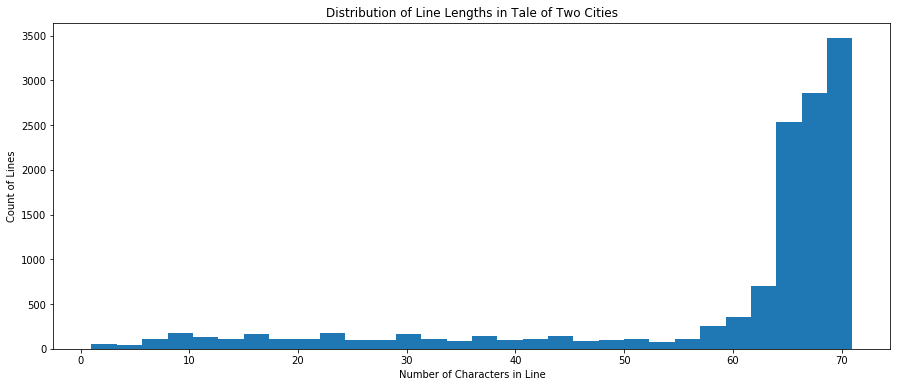

In [9]:
NUM_BINS = 30 # increase this number to make the visualization more granular
plt.rcParams["figure.figsize"] = (15,6)
plt.hist([len(line) for line in lines], bins=NUM_BINS)
plt.title("Distribution of Line Lengths in Tale of Two Cities") # give the plot a title
plt.xlabel("Number of Characters in Line") # label the X axis
plt.ylabel("Count of Lines") # label the Y axis
plt.show()

What if now we want to visualize how many times each word appears in the entire novel (for now, we won't worry about **stemming / lemmatization** and other preprocessing steps)?

### First Method: Create a Dictionary to Store Word Count

Dictionaries in Python have **keys** and **values**. The keys must be unique (no duplicate keys). They can be accessed via the **`keys()`** and **`values()`** methods of a dictionary object.


In [10]:
words = [] # create a list of all words
word_count = {} # create a dictionary to store word counts

for line in lines: # for each line in the novel
    for word in line.split(" "): # for each word in the line
        words.append(word) # add the word to the list of words
        
        if word not in word_count.keys(): # if the word has not been seen before, add it to the dictionary with initial count of 1
            word_count[word] = 1
        else:
            word_count[word] += 1 # if the word has been seen before, increment its count by 1
        
print(f"There's an estimated {len(words)} words in the novel.")
print(f"There's {len(word_count.keys())} unique words in the novel.")

There's an estimated 143345 words in the novel.
There's 21683 unique words in the novel.


Let's use Python **`sets`** to check that our dictionary's keys are unique. Remember that a set is a collection of **unique elements**, so calling **`set(words)`** will return only the unique words in our text file.

In [11]:
assert len(word_count.keys()) == len(set(words)), "This error message will be printed if the assertion to the left is not true."

### Using Python's Built-In Counter

Since the task of building a count using a dictionary is a common operation, Python provides a built-in object called `Counter` that we can use:

In [12]:
from collections import Counter

def count_words(lines, delimiter=" "):
    
    words = Counter() # instantiate a Counter object called words
    for line in lines:
        for word in line.split(delimiter):
            words[word] += 1 # increment count for word
    return words

A core principle of software engineering and programming is **DRY**: Don't Repeat Yourself. Since we are likely going to be making many histograms throughout this course, it's best that we create a reusable function.

In [13]:
def make_histogram(values, title=None,xlabel=None,ylabel=None, bins=30, x_size=15, y_size=6):
    plt.rcParams["figure.figsize"] = (x_size,y_size)
    plt.hist(values, bins=bins)
    
    if title:
        plt.title(title) # give the plot a title
        
    if xlabel:
        plt.xlabel(xlabel) # label the X axis
        
    if ylabel:
        plt.ylabel(ylabel) # label the Y axis
        
    plt.show() 

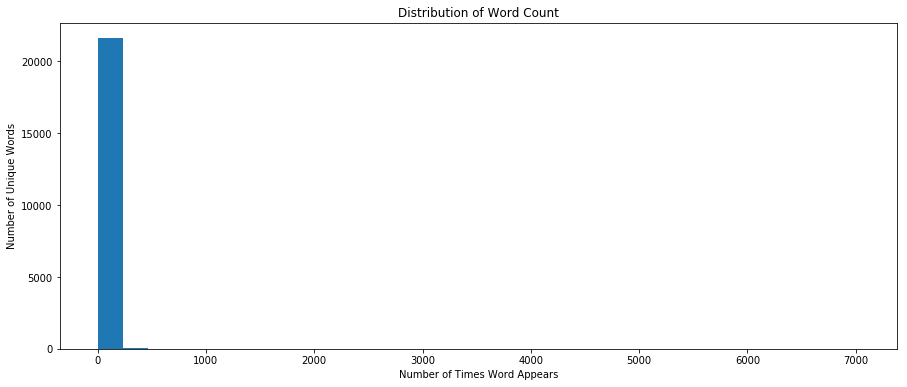

In [14]:
make_histogram(word_count.values(), 
               title="Distribution of Word Count",
               xlabel="Number of Times Word Appears",
               ylabel="Number of Unique Words")

### In-Class Question:
- Why does this distribution look the way it does? 
- What additional steps could be taken to make the results more meaningful?

In [16]:
import pandas as pd # output the results to a dataframe
word_count_df = pd.DataFrame(columns=["word", "frequency"]) # create a dataframe with two columns, word and frequency

word_count_df["word"] = list(word_count.keys())
word_count_df["frequency"] = list(word_count.values())
word_count_df.to_csv("dickens_word_count.csv") # saves to an outputs folder - if you don't have one, Python will throw an error

# Encoding Styles

This is not a computer science class, but in your practical work, you will frequently have to deal with text that is encoded in a variety of styles. Understanding the difference between them is key.

## Bits and Bytes

- Computers, at its lowest level, store everything in the form of bits (either a 0 or a 1). The amount of information that can be represented in a computer is determined by the number of bits.

For instance, a using only 4 bits, you can store **$2^4$ = 16** different values.
<figure>
  <img src="images/binary.png" alt="my alt text"/>
    <figcaption><i>How <b>$101010$</b> is converted to decimal (human-readable numbers): each of the green numbers is summed up to equal 42.</i></figcaption>
</figure>

It is not physically efficient for a computer to try to read one bit at a time, so typically data is stored in **8-bit** groups called **bytes**.

## ASCII

The oldest, yet still relevant encoding style to be aware of is **ASCII**, where computers represent text (**every character on a keyboard**) initially as a number between 0 and 127 (question: how many bits does it take to do this?)

<figure>
  <img src="images/ascii.svg" alt="my alt text"/>
    <figcaption><i>ASCII table converting numbers to characters.<b>(Wikipedia)</b></i></figcaption>
</figure>

*If the smallest amount of data a computer can realistically read in is a byte (**8-bits**), why is ASCII only **7-bits**?* The last bit is used for error checking - to ensure that the data wasn't corrected or unintentionally altered.

The dominant language in earlier eras of computing was English. People began to realize that ASCII was relatively limited, and even other European languages could not be properly supported. 

Characters such as `Ç` (pronounced `ch` in Turkish, for instance), is represented by the number `199`. The Spanish word `año` (year), could be represented as 



## Unicode

128 characters is not enough to represent the characters in other Languages, like **Greek, Turkish, Cyrillic**, etc., or newer social media phenomenons like **emojis**. Unicode stores text as either 8, 16, or 32 bits (1, 2, or 4 bytes). This means there's significantly more characters that can be encoded (approximately 1 billion characters).

As a point of reference, there's a total of **50,000** characters in the Chinese language (but only around **15-20,000** that are used commonly).

If you don't specify the right encoding to read in text, you'll end up with something like this:
<figure>
  <img src="images/mojibake.png" alt="my alt text"/>
    <figcaption><i>ASCII table converting numbers to characters.<b>(Wikipedia)</b></i></figcaption>
</figure>

# The Scale of Data in the 21st Century

<figure>
  <img src="images/scale.png" alt="my alt text"/>
    <figcaption><i>ASCII table converting numbers to characters.<b>(Wikipedia)</b></i></figcaption>
</figure>

# Former In-Class Exercise (Now Homework 1B)

You are a business analyst working for a major US toy retailer:

* A manager in the marketing department wants to find out the most frequently used words in positive reviews (five stars) and negative reviews (one star) in order to determine who the toys are being bought for (sons, significant others, grandchildren, siblings, self, etc.). He would like your opinion on which customer segments' (son, daughter, granddaugher, grandson, niece, nephew, sibling, significant other, etc.) marketing messaging tends to outperform other segments.

* One of your product managers suspects that **toys with batteries tend to be significantly lower rated than toys that do not require batteries**. She would like to see some data points confirming or rejecting her hypothesis. 

Perform the same word count analysis using the reviews received from Amazon to answer your marketing manager's question. They are stored in two files, (`poor_amazon_toy_reviews.txt`) and (`good-amazon-toy-reviews.txt`). **Provide a few sentences with your findings and business recommendations.** Make any assumptions you'd like to- this is a fictitious company after all. I just want you to get into the habit of "finishing" your analysis: to avoid delivering technical numbers to a non-technical manager.

**Submit everything as a new notebook, either via Slack direct message to me, or email to me (ychen220@usc.edu).**


In [8]:
from collections import Counter

words = []
count = 0
for line in open("good_amazon_toy_reviews.txt").readlines():
    for word in line.split(" "):
        words.append(word)
    count += 1
#words = process_words_map_filter(words)
word_count = Counter()
for word in words:
    word_count[word] += 1
sorted_word_counts = sorted(word_count.items(), key=lambda x: x[1])
sorted_word_counts.reverse()

def convert_to_proportion(word_tuple):
    return (word_tuple[0], round(word_tuple[1]/count * 100,3))

sorted_word_counts = list(map(convert_to_proportion, sorted_word_counts))

In [6]:
for word in sorted_word_counts:
    if word[0] == "battery":
        print(word)

('battery', 2.598)


In [9]:
count

102217